<h1 align="center">ASSIGNMENT 1</h1> 


In [1]:
#importing packages
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#creating datframes
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

## Part 1

In [3]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
price = df['price_range'] #getting the price column values in a different dataframe in order to compare better
price

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [5]:
corr = df.corrwith(price) #finding correlation values for each parameter
corr

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
dtype: float64

<AxesSubplot:>

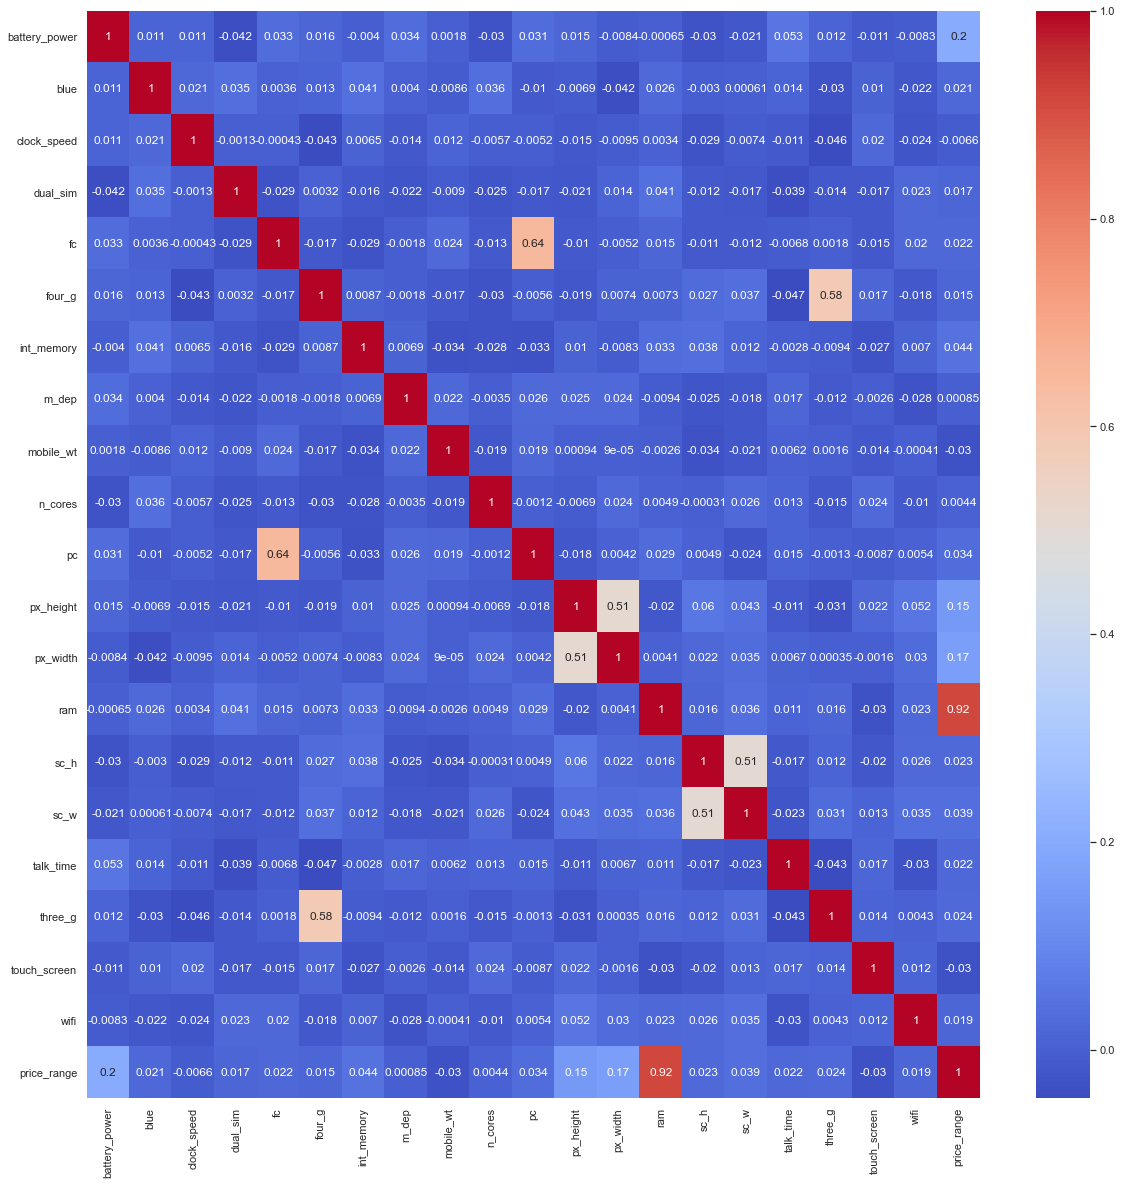

In [6]:
corr_h = df.corr()
plt.figure(figsize = (20,20))

sns.heatmap(corr_h,cmap="coolwarm",annot=True)

## Part 2

In [7]:
# Replacing target values 0 --> 0 and 1,2,3 --> 1
price = price.replace([1, 2, 3], 1)
price

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

In [8]:
#creating numpy array of the target variable
y = np.array(price)
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

## Part 3

In [9]:
train_features = df[['battery_power','px_height','px_width','ram']] #splitting the features from the database
train_features 


,battery_power,px_height,px_width,ram
0,842,20,756,2549
1,1021,905,1988,2631
2,563,1263,1716,2603
3,615,1216,1786,2769
4,1821,1208,1212,1411
...,...,...,...,...
1995,794,1222,1890,668
1996,1965,915,1965,2032
1997,1911,868,1632,3057
1998,1512,336,670,869


In [10]:
X = np.array(train_features) #creating numpy array of the feature variables
X

array([[ 842,   20,  756, 2549],
       [1021,  905, 1988, 2631],
       [ 563, 1263, 1716, 2603],
       ...,
       [1911,  868, 1632, 3057],
       [1512,  336,  670,  869],
       [ 510,  483,  754, 3919]], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0) #splitting the dataset into test and train

In [12]:
from sklearn.linear_model import LogisticRegression #import class
lreg = LogisticRegression()
lreg.fit(X_train, y_train) #fitting the model on data

LogisticRegression()

In [13]:
#predicting the target values of the test split
y_pred=lreg.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) #confusion matrix will give us the proper number of incorrect values.
cnf_matrix


array([[ 91,   4],
       [  2, 303]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

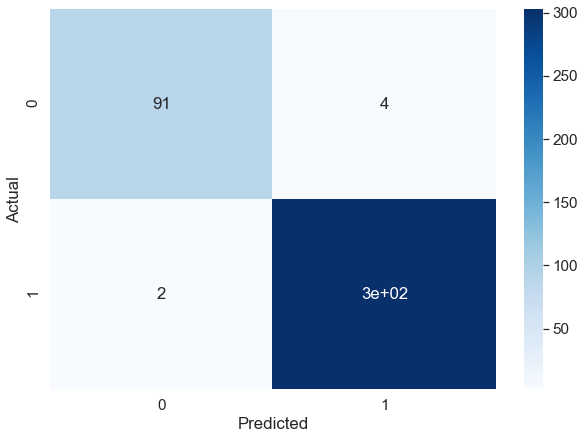

In [15]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True)# font size

In [16]:
X_test_2 = df2[['battery_power','px_height','px_width','ram']]
X_test_2

,battery_power,px_height,px_width,ram
0,1043,226,1412,3476
1,841,746,857,3895
2,1807,1270,1366,2396
3,1546,295,1752,3893
4,1434,749,810,1773
...,...,...,...,...
995,1700,644,913,2121
996,609,1152,1632,1933
997,1185,477,825,1223
998,1533,38,832,2509


In [17]:
X_test_2 = np.array(X_test_2)
X_test_2

array([[1043,  226, 1412, 3476],
       [ 841,  746,  857, 3895],
       [1807, 1270, 1366, 2396],
       ...,
       [1185,  477,  825, 1223],
       [1533,   38,  832, 2509],
       [1270,  457,  608, 2828]], dtype=int64)

In [18]:
y_pred_2 = lreg.predict(X_test_2)
y_pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

## Part 4

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #comparing predicted values with true values in order to determine the accuracy 

0.985

<h1 align="center">ASSIGNEMNT 2</h1> 

In [20]:
#importing additional packages
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [21]:
iris_data = pd.read_csv('iris.csv')
iris_data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part 1

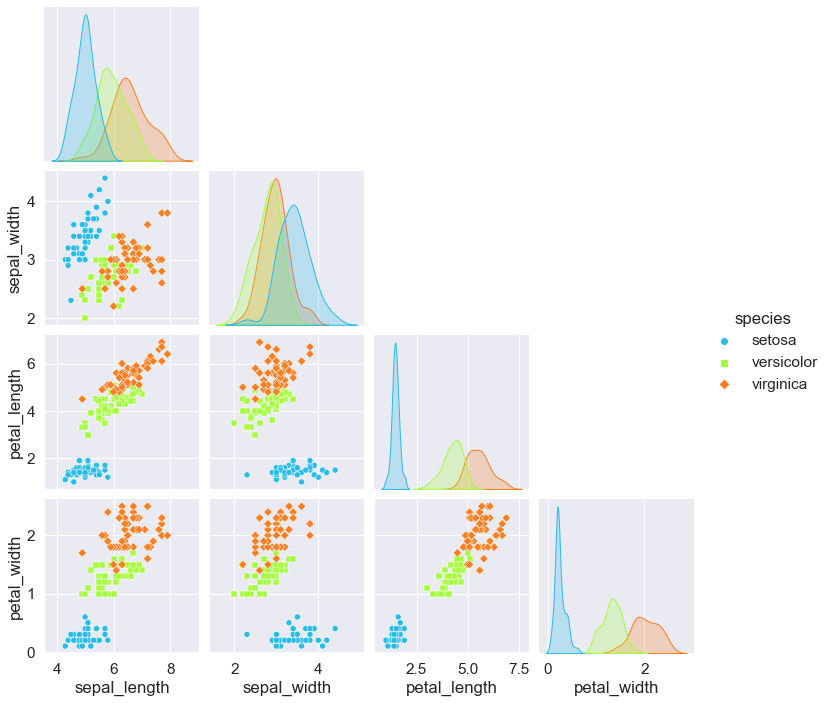

In [22]:
iris_data_plot = sns.load_dataset("iris")
sns.pairplot(iris_data_plot, hue="species",corner = True, palette = 'turbo', markers=["o", "s", "D"])

## Part 2

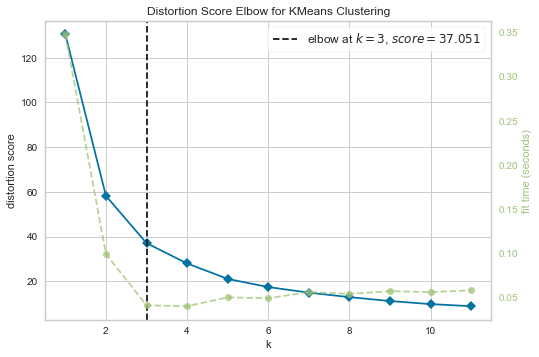

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
X1 = iris_data[['sepal.length','sepal.width']]
y = iris_data['variety']
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(1,12))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [24]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=3)

In [25]:
kmeans1.fit(X1)

KMeans(n_clusters=3)

In [26]:
centers = kmeans1.cluster_centers_
centers

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [27]:
X1['k_means']=kmeans1.predict(X1)

<ipython-input-27-543e9c486336>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['k_means']=kmeans1.predict(X1)


In [28]:
from sklearn.metrics.cluster import adjusted_rand_score

score = adjusted_rand_score(y,kmeans1.labels_)
print(score)

0.6006861021484542


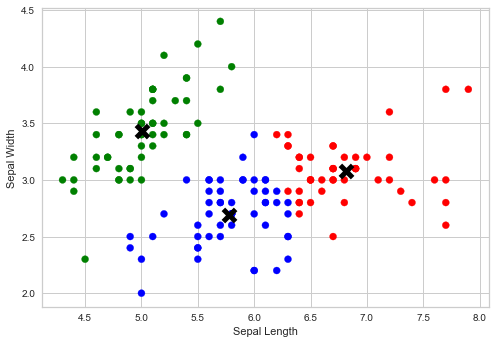

In [29]:

colors = ["green","red","blue"]
labels = kmeans1.labels_
#sns.scatterplot(data=X1, x="sepal.length", y="sepal.width", hue="k_means",palette = 'turbo')
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], c=np.array(colors)[labels],label = '1')

plt.scatter(centers[:, 0], centers[:, 1],  marker = "x", s=150, 
    linewidths = 5, zorder = 10, c=['black'])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

## Part 3

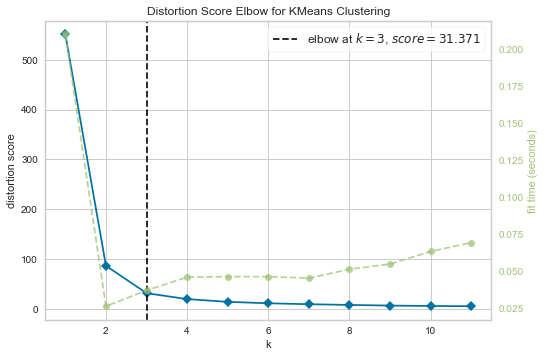

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
X2 = iris_data[['petal.length','petal.width']]


# Instantiate the clustering model and visualizer
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(1,12))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [31]:
kmeans2 = KMeans(n_clusters=3)

In [32]:
kmeans2.fit(X2)

KMeans(n_clusters=3)

In [33]:
centers2 = kmeans2.cluster_centers_
centers2

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

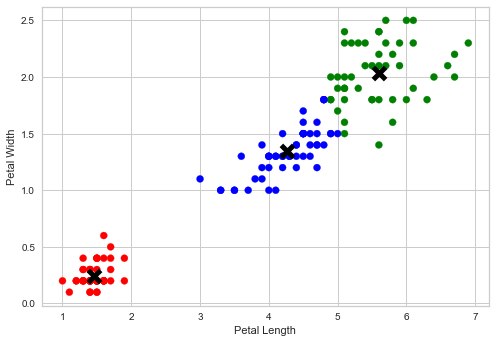

In [34]:


labels2 = kmeans2.labels_
plt.scatter(X2.iloc[:,0], X2.iloc[:,1], c=np.array(colors)[labels2])

plt.scatter(centers2[:, 0], centers2[:, 1],  marker = "x", s=150, 
    linewidths = 5, zorder = 10, c=['black'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

In [35]:
score = adjusted_rand_score(y,kmeans2.labels_)
print(score)

0.8856970310281228


## Part 4

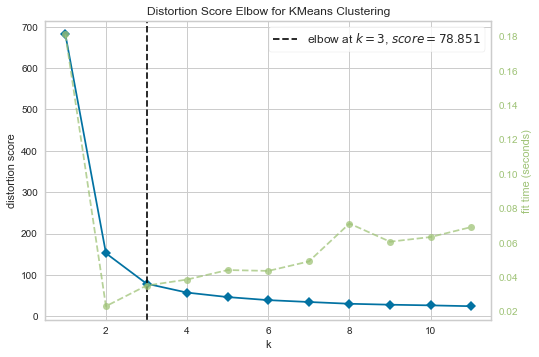

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
X3 = iris_data[['sepal.length','sepal.width','petal.length','petal.width']]
# Instantiate the clustering model and visualizer
model3 = KMeans()
visualizer = KElbowVisualizer(model3, k=(1,12))

visualizer.fit(X3)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [37]:
kmeans3 = KMeans(n_clusters=3)

In [38]:
kmeans3.fit(X3)

KMeans(n_clusters=3)

In [39]:
centers3 = kmeans3.cluster_centers_
centers3

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [40]:
score = adjusted_rand_score(y,kmeans3.labels_)
print(score)

0.7302382722834697


<h1 align="center">ASSIGNEMNT 3</h1

## Part1

In [41]:
#filling the centers
center_class1 = np.array([4,11])
center_class2 = np.array([10,3])

In [42]:
#Covariance matrix
cov_class1 = [[0.3,0],[0,0.3]]
cov_class2 = [[1,0],[0,1]]

In [43]:
data_class_1 = np.random.multivariate_normal(center_class1, cov_class1, 150)
data_class_2 = np.random.multivariate_normal(center_class2, cov_class2, 150)

In [44]:
data_class_1.shape

(150, 2)

In [45]:
data_class_2.shape

(150, 2)

In [46]:
final_data = np.concatenate((data_class_1, data_class_2), axis = 0)
final_data.shape


(300, 2)

## Part 2

In [47]:
x1 = data_class_1[:,0]
y1 = data_class_1[:,1]
x2 = data_class_2[:,0]
y2 = data_class_2[:,1]

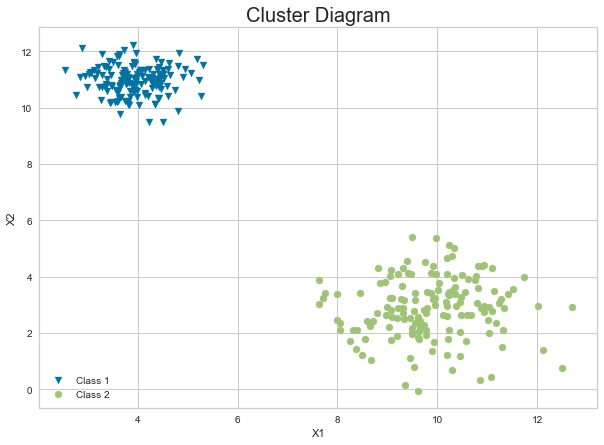

In [48]:
plt.figure(figsize = (10,7))
plt.scatter(x1,y1,marker = 'v') #for class 1
plt.scatter(x2,y2) #for class 2
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(["Class 1", "Class 2"], loc ="lower left")
plt.title('Cluster Diagram', size = 20)



plt.show()

## Part 4

In [49]:
#Creating two arrays one with zeros and other with ones to tell the classes apart
class1_ = np.zeros((150,1), dtype=int)
class2_ = np.ones((150,1), dtype=int)
y = np.append(class1_, class2_, axis=0) #y has the classification 


In [51]:
pip install mlxtend

  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


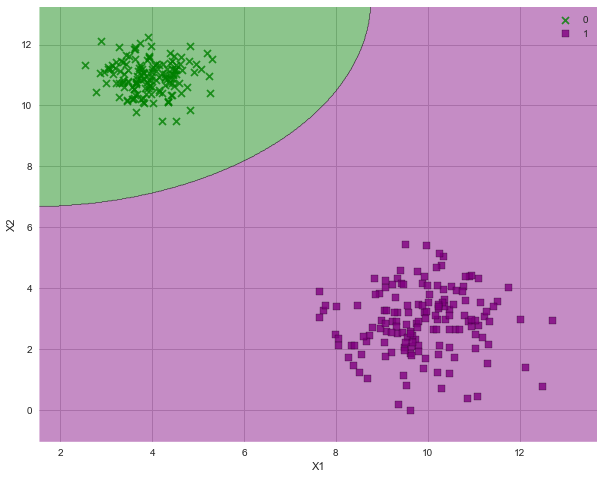

In [52]:
from sklearn.naive_bayes import GaussianNB 
from mlxtend.plotting import plot_decision_regions
Baysian_classifier = GaussianNB()

Baysian_classifier.fit(final_data,y)

fig = plt.figure(figsize=(10,8))
plt.xlabel('X1')
plt.ylabel('X2')
fig = plot_decision_regions(X=final_data, y=y.ravel(), clf=Baysian_classifier, colors = 'green,purple',markers = 'x,v') #.ravel() returns a contiguous flattened array.
plt.show()

## Part 4

<ipython-input-53-49a66c1d6464>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn1.fit(final_data, y)


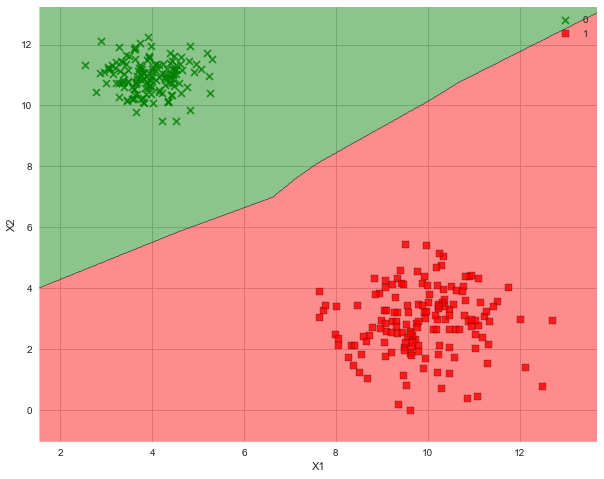

In [53]:
from sklearn.neighbors import KNeighborsClassifier  
knn1 = KNeighborsClassifier(n_neighbors=1)  
knn1.fit(final_data, y)

fig = plt.figure(figsize=(10,8))
plt.xlabel('X1')
plt.ylabel('X2')
fig = plot_decision_regions(X=final_data, y=y.ravel(), clf=knn1,  colors = 'green,red',markers = 'x,v')
plt.show()  

<ipython-input-54-2c740557f4a9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(final_data, y)


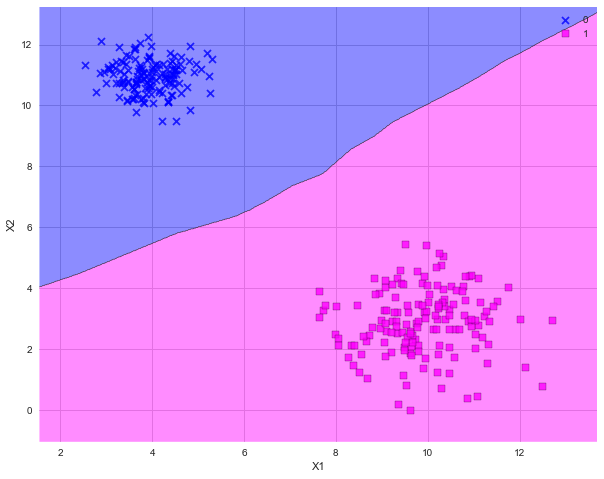

In [54]:
from sklearn.neighbors import KNeighborsClassifier  
knn2 = KNeighborsClassifier(n_neighbors=5)  
knn2.fit(final_data, y)

fig = plt.figure(figsize=(10,8))
plt.xlabel('X1')
plt.ylabel('X2')
fig = plot_decision_regions(X=final_data, y=y.ravel(), clf=knn2,  colors = 'blue,magenta',markers = 'x,^')
plt.show() 

<ipython-input-55-7ea058c94562>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn3.fit(final_data, y)


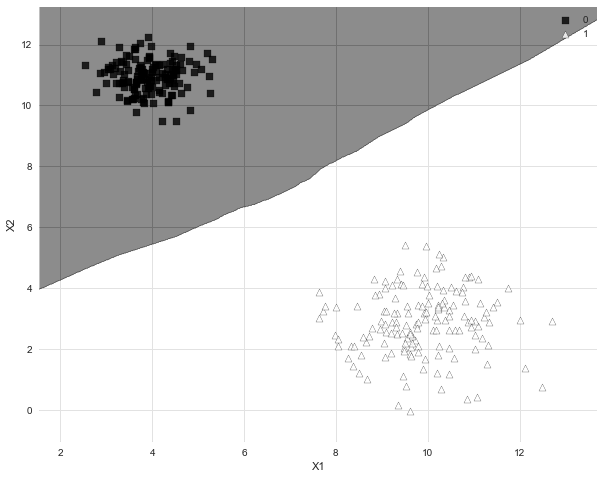

In [55]:
from sklearn.neighbors import KNeighborsClassifier  
knn3 = KNeighborsClassifier(n_neighbors=8)  
knn3.fit(final_data, y)

fig = plt.figure(figsize=(10,8))
plt.xlabel('X1')
plt.ylabel('X2')
fig = plot_decision_regions(X=final_data, y=y.ravel(), clf=knn3,  colors = 'black,white')
plt.show() 

<ipython-input-56-53d3418df6b2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn3.fit(final_data, y)


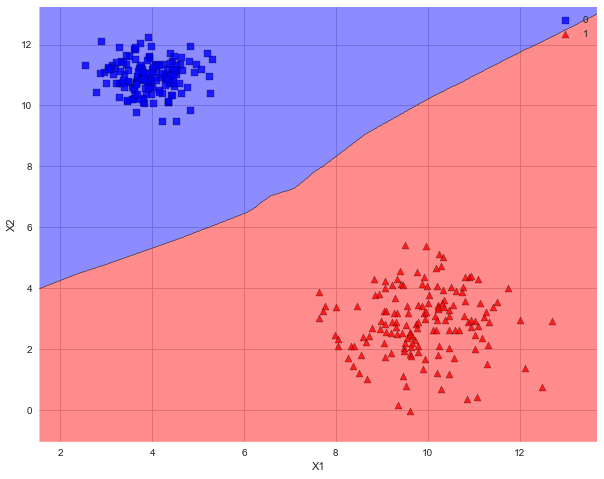

In [56]:
from sklearn.neighbors import KNeighborsClassifier  
knn3 = KNeighborsClassifier(n_neighbors=3)  
knn3.fit(final_data, y)

fig = plt.figure(figsize=(10,8))
plt.xlabel('X1')
plt.ylabel('X2')
fig = plot_decision_regions(X=final_data, y=y.ravel(), clf=knn3,  colors = 'blue,red')
plt.show() 

<h1 align="center">ASSIGNEMNT 4</h1

In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [58]:
import pandas as pd
world=pd.read_csv('worldwide-aggregate_csv.csv',index_col='Date',parse_dates=True)

world

,Confirmed,Recovered,Deaths,Increase rate
Date,,,,
2020-01-22,557,30,17,NaN
2020-01-23,655,32,18,17.594255
2020-01-24,941,39,26,43.664122
2020-01-25,1433,42,42,52.284803
2020-01-26,2118,56,56,47.801814
...,...,...,...,...
2021-07-26,194720787,128063203,4167740,0.279339
2021-07-27,195334304,128409042,4177716,0.315075
2021-07-28,195968310,128745705,4187379,0.324575


<AxesSubplot:xlabel='Date'>

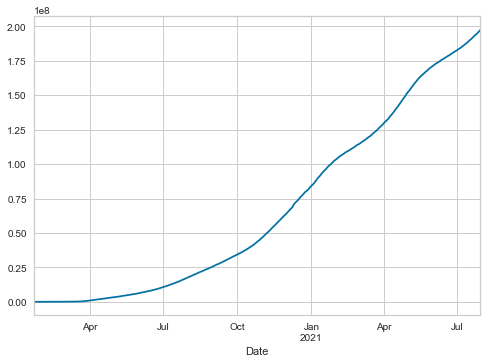

In [59]:
world['Confirmed'].plot()


<AxesSubplot:xlabel='Date'>

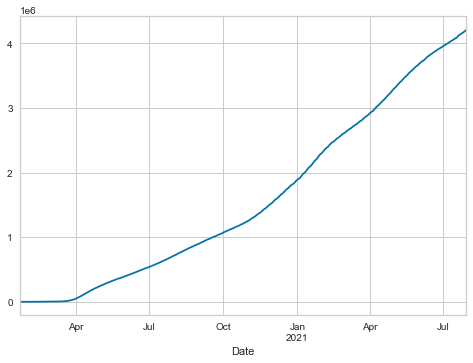

In [60]:
world['Deaths'].plot()

In [61]:
from statsmodels.tsa.stattools import adfuller
adfuller(world['Confirmed'])

(1.5810798127644758,
 0.9977996887369756,
 17,
 538,
 {'1%': -3.442563336759378,
  '5%': -2.866927190004947,
  '10%': -2.5696391843672695},
 13240.9014925361)

In [62]:
from pmdarima import auto_arima

In [63]:
datawise_fit = auto_arima(world['Confirmed'])

In [64]:
datawise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  556
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -6826.908
Date:                Mon, 02 Aug 2021   AIC                          13669.815
Time:                        11:22:59   BIC                          13704.352
Sample:                             0   HQIC                         13683.307
                                - 556                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5292      0.042     12.493      0.000       0.446       0.612
ar.L2         -0.5523      0.029    -18.958      0.000      -0.609      -0.495
ar.L3         -0.3435      0.027    -12.768      0.000      -0.396      -0.291
ar.L4         -0.2088      0.029     -7.251      0.000      -0.265      -0.152
ar.L5         -0.1845      0.046     -3.981      0.000      -0.275      -0.094
ma.L1         -1.1795      0.038    -31.172      0.000      -1.254      -1.105
ma.L2          0.8605      0.025     34.455      0.000       0.812       0.909
sigma2      3.385e+09   2.49e-11   1.36e+20      0.000    3.38e+09    3.38e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            205594.34
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              27.40   Skew:                             4.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        96.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+34. Standard errors may be unstable.
"""

In [65]:
from statsmodels.tsa.arima_model import ARIMA

In [66]:
print(world.shape)
train = world.iloc[:-60] 
test = world.iloc[-60:]
print(train.shape,test.shape)

(556, 4)
(496, 4) (60, 4)


In [67]:
model = ARIMA(train['Confirmed'],order=(5,2,2))
model = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn

In [68]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end,typ = 'levels')
print (pred)


2021-06-01    1.711795e+08
2021-06-02    1.716677e+08
2021-06-03    1.721678e+08
2021-06-04    1.726475e+08
2021-06-05    1.730855e+08
2021-06-06    1.734892e+08
2021-06-07    1.738962e+08
2021-06-08    1.743412e+08
2021-06-09    1.748301e+08
2021-06-10    1.753362e+08
2021-06-11    1.758213e+08
2021-06-12    1.762635e+08
2021-06-13    1.766741e+08
2021-06-14    1.770884e+08
2021-06-15    1.775394e+08
2021-06-16    1.780326e+08
2021-06-17    1.785424e+08
2021-06-18    1.790317e+08
2021-06-19    1.794794e+08
2021-06-20    1.798968e+08
2021-06-21    1.803181e+08
2021-06-22    1.807751e+08
2021-06-23    1.812727e+08
2021-06-24    1.817863e+08
2021-06-25    1.822797e+08
2021-06-26    1.827330e+08
2021-06-27    1.831571e+08
2021-06-28    1.835854e+08
2021-06-29    1.840482e+08
2021-06-30    1.845504e+08
2021-07-01    1.850676e+08
2021-07-02    1.855653e+08
2021-07-03    1.860241e+08
2021-07-04    1.864550e+08
2021-07-05    1.868902e+08
2021-07-06    1.873589e+08
2021-07-07    1.878656e+08
2

<AxesSubplot:xlabel='Date'>

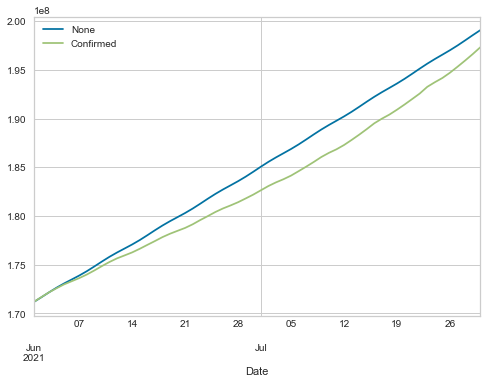

In [69]:
pred.plot(legend=True)
test['Confirmed'].plot(legend = True)

In [70]:
mean =test['Confirmed'].mean()
mean

183121055.01666668

In [71]:

test['Confirmed'].mean()
rmse=sqrt(mean_squared_error(pred,test['Confirmed']))
print(rmse)

2043365.4282922049


In [72]:
per = (rmse/mean)*100
per

1.1158549889886933